# Exercise 1

Necessary Dependencies

In [72]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

Given Data

In [71]:
data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])
x = np.mean(data)

print(x, data)

58.0 [56 60 58 55 57 59 61 56 58 60]


## Solution A

Defining the Model:

In [61]:
with pm.Model() as ambient_noise_model:

    #priors
    mu = pm.Normal("mu", mu=x, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)

    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu, sigma = sigma, observed=data)

    trace_weak = pm.sample(2000, tune=2000, return_inferencedata=True)
    summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
print(summary_weak)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2 seconds.


         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.005  0.783    56.484     59.570      0.012    0.015    4576.0   
sigma   2.337  0.669     1.276      3.654      0.011    0.015    4655.0   

       ess_tail  r_hat  
mu       3979.0    1.0  
sigma    4014.0    1.0  


## Solution b

extract HDI

In [62]:
mu_hdi = az.hdi(trace_weak.posterior["mu"], hdi_prob=0.95)
sigma_hdi = az.hdi(trace_weak.posterior["sigma"], hdi_prob=0.95)

print(f"\n95% HDI for mu: [{mu_hdi['mu'].values[0]:.3f}, {mu_hdi['mu'].values[1]:.3f}]")
print(f"95% HDI for sigma: [{sigma_hdi['sigma'].values[0]:.3f}, {sigma_hdi['sigma'].values[1]:.3f}]")


95% HDI for mu: [56.484, 59.570]
95% HDI for sigma: [1.276, 3.654]


Plot

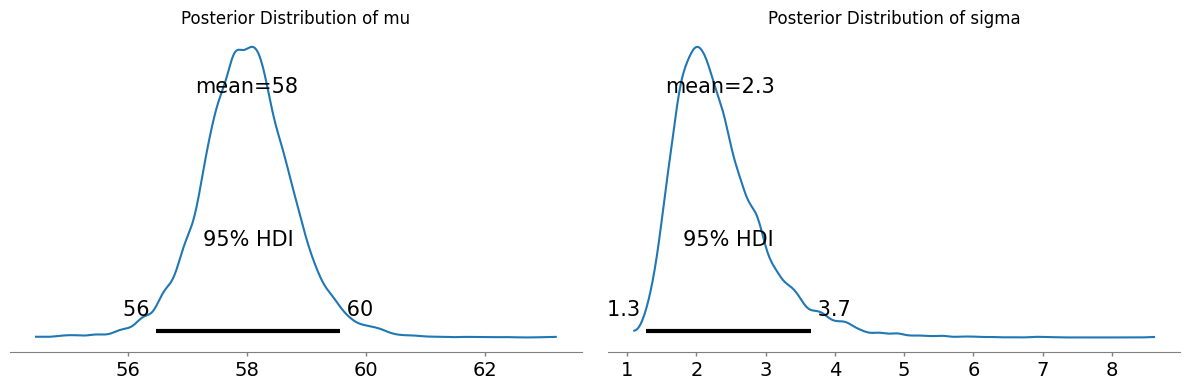

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
az.plot_posterior(trace_weak, var_names=["mu"], hdi_prob=0.95, ax=axes[0])
axes[0].set_title("Posterior Distribution of mu")
az.plot_posterior(trace_weak, var_names=["sigma"], hdi_prob=0.95, ax=axes[1])
axes[1].set_title("Posterior Distribution of sigma")
plt.tight_layout()
plt.show()

## solution C

Comparing frequency estimation

In [74]:
#frequentist
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

#Bayesian Posterior
bayesian_mean = np.mean(trace_weak.posterior["mu"].values)
bayesian_std = np.mean(trace_weak.posterior["sigma"].values)

Conclusion

In [75]:
print("Frequentist estimation")
print("Sample mean: ", sample_mean)
print("Sample std: ", sample_std)

print("Bayesian estimation")
print("Bayesian mean: ", bayesian_mean)
print("Bayesian std: ", bayesian_std)

#Difference

print("Difference")
print("Bayesian mean - frequentist mean: ", abs(bayesian_mean - sample_mean))
print("Bayesian std - frequentist std: ", abs(bayesian_std - sample_std))

Frequentist estimation
Sample mean:  58.0
Sample std:  2.0
Bayesian estimation
Bayesian mean:  58.00514847227544
Bayesian std:  2.337456221731294
Difference
Bayesian mean - frequentist mean:  0.0051484722754366885
Bayesian std - frequentist std:  0.3374562217312942


## Solution D

Defining the model

In [66]:
with pm.Model() as strong_ambient_noise_model:
    mu = pm.Normal("mu", mu=50, sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=10)

    likelihood = pm.Normal("likelihood", mu=mu, sigma=sigma, observed=data)

    trace_strong = pm.sample(2000, tune=1000, return_inferencedata=True)
    summary_strong = az.summary(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)
print(summary_strong)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     51.361  1.084    49.304     53.534      0.017    0.013    3984.0   
sigma   7.620  2.161     4.090     12.050      0.034    0.036    3878.0   

       ess_tail  r_hat  
mu       4088.0    1.0  
sigma    3468.0    1.0  


Comparing with previous model

In [67]:
print(summary_weak)
print(summary_strong)

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.005  0.783    56.484     59.570      0.012    0.015    4576.0   
sigma   2.337  0.669     1.276      3.654      0.011    0.015    4655.0   

       ess_tail  r_hat  
mu       3979.0    1.0  
sigma    4014.0    1.0  
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     51.361  1.084    49.304     53.534      0.017    0.013    3984.0   
sigma   7.620  2.161     4.090     12.050      0.034    0.036    3878.0   

       ess_tail  r_hat  
mu       4088.0    1.0  
sigma    3468.0    1.0  


In [68]:
mu_hdi_strong = az.hdi(trace_strong.posterior["mu"], hdi_prob=0.95)
sigma_hdi_strong = az.hdi(trace_strong.posterior["sigma"], hdi_prob=0.95)

print(f"\n95% HDI for mu (strong prior): [{mu_hdi_strong['mu'].values[0]:.3f}, {mu_hdi_strong['mu'].values[1]:.3f}]")
print(f"95% HDI for sigma (strong prior): [{sigma_hdi_strong['sigma'].values[0]:.3f}, {sigma_hdi_strong['sigma'].values[1]:.3f}]")


95% HDI for mu (strong prior): [49.304, 53.534]
95% HDI for sigma (strong prior): [4.090, 12.050]


Plot Comparison

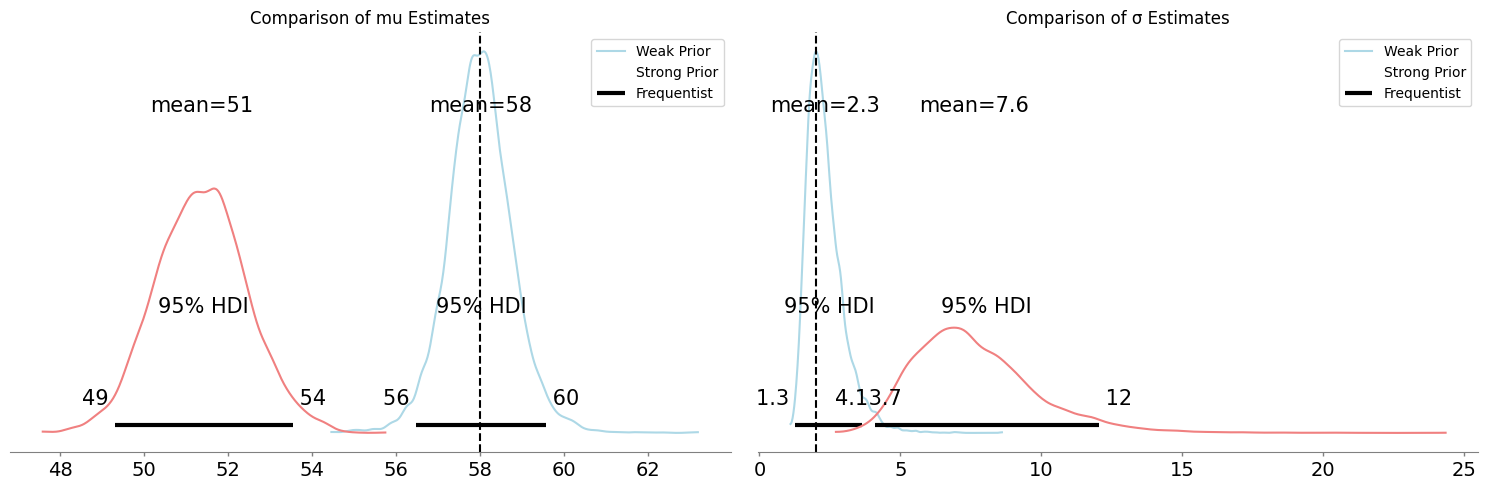

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# μ comparison
az.plot_posterior(trace_weak, var_names=["mu"], hdi_prob=0.95, ax=axes[0], color='lightblue')
az.plot_posterior(trace_strong, var_names=["mu"], hdi_prob=0.95, ax=axes[0], color='lightcoral')
axes[0].axvline(sample_mean, color='black', linestyle='--', label='Frequentist')
axes[0].set_title("Comparison of mu Estimates")
axes[0].legend(['Weak Prior', 'Strong Prior', 'Frequentist'])

# σ comparison
az.plot_posterior(trace_weak, var_names=["sigma"], hdi_prob=0.95, ax=axes[1], color='lightblue')
az.plot_posterior(trace_strong, var_names=["sigma"], hdi_prob=0.95, ax=axes[1], color='lightcoral')
axes[1].axvline(sample_std, color='black', linestyle='--', label='Frequentist')
axes[1].set_title("Comparison of σ Estimates")
axes[1].legend(['Weak Prior', 'Strong Prior', 'Frequentist'])

plt.tight_layout()
plt.show()